In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

# Line plot

In [21]:
# Read the text file into a DataFrame
#Input: 10 runs per enemy set 

df = pd.read_csv('/Users/j.m.vandennieuwenhof/Library/CloudStorage/OneDrive-Persoonlijk/Business Analytics  Onedrive/master/Jaar 3/Evo comp/Assignment2/EvoMan---Generalist/logs.txt', delimiter=',')  # Adjust the delimiter as needed
print(df.columns)
#create dummy datasets for the plots --> all need 10 runs
#These datasets should contain the mean of the mean fitness, the mean of the max fitness, and the standard deviation over these means calculated over 10 runs
df['stdev(mean.fitness)'] = df['std.fitness']
df['stdev(max.fitness)'] = df['std.fitness']*0.5
df['mean(mean.fitness)'] = df['mean.fitness']
df['mean(max.fitness)'] = df['max.fitness']
df = df[['generation', 'mean(mean.fitness)','stdev(mean.fitness)','mean(max.fitness)','stdev(max.fitness)','set of enemies  ']]
df_EA1_group1 = df.copy()
df_EA1_group2 = df.copy()
df_EA2_group1 = df.copy()
df_EA2_group2 = df.copy()

#Adjust values
#EA1
df_EA1_group2.loc[:, df_EA1_group1.columns.difference(['generation', 'set of enemies  '])] *= 0.8
df_EA2_group1.loc[:, df_EA1_group1.columns.difference(['generation', 'set of enemies  '])] *= 0.6
df_EA2_group2.loc[:, df_EA1_group1.columns.difference(['generation', 'set of enemies  '])] *= 0.4


Index(['run id', 'generation', 'max.fitness', 'mean.fitness', 'min.fitness',
       'std.fitness', 'set of enemies  '],
      dtype='object')


In [12]:
df_EA1_group1

,generation,mean(mean.fitness),stdev(mean.fitness),mean(max.fitness),stdev(max.fitness),set of enemies
0,0,-1.8080,7.8108,30.2570,3.90540,6 7
1,1,1.2540,9.0610,30.2570,4.53050,6 7
2,2,3.2217,9.2341,30.2570,4.61705,6 7
3,3,8.6906,13.9304,66.1565,6.96520,6 7
4,4,14.5580,15.0455,66.1565,7.52275,6 7
5,5,21.6651,16.8222,66.1565,8.41110,6 7
6,6,33.3083,19.3706,66.1565,9.68530,6 7
7,7,43.3015,19.5275,66.1623,9.76375,6 7
8,8,45.4733,20.3277,66.1889,10.16385,6 7
9,9,54.1651,15.8262,66.1889,7.91310,6 7


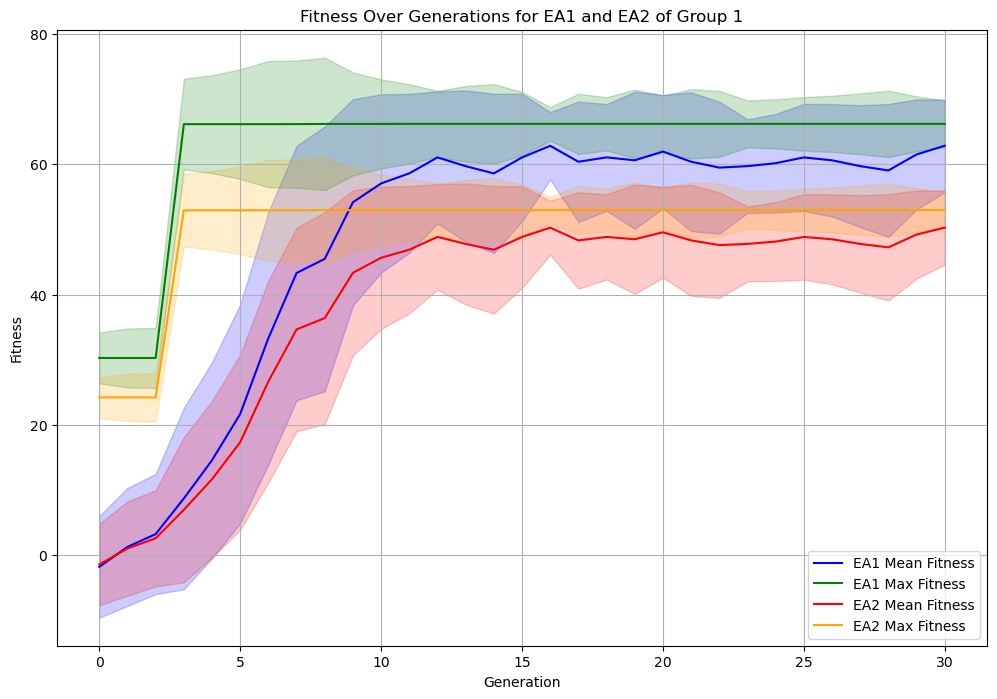

In [20]:
import matplotlib.pyplot as plt

# Plotting the data with shaded regions
plt.figure(figsize=(12, 8))

# Plot for df_EA1_group1 (EA1)
plt.plot(df_EA1_group1['generation'], df_EA1_group1['mean(mean.fitness)'], label='EA1 Mean Fitness', color='blue')
plt.fill_between(df_EA1_group1['generation'], 

                 df_EA1_group1['mean(mean.fitness)'] - df_EA1_group1['stdev(mean.fitness)'], 
                 df_EA1_group1['mean(mean.fitness)'] + df_EA1_group1['stdev(mean.fitness)'], 
                 color='blue', alpha=0.2)

plt.plot(df_EA1_group1['generation'], df_EA1_group1['mean(max.fitness)'], label='EA1 Max Fitness', color='green')
plt.fill_between(df_EA1_group1['generation'], 
                 df_EA1_group1['mean(max.fitness)'] - df_EA1_group1['stdev(max.fitness)'], 
                 df_EA1_group1['mean(max.fitness)'] + df_EA1_group1['stdev(max.fitness)'], 
                 color='green', alpha=0.2)

# Plot for df_EA2_group1 (EA2)
plt.plot(df_EA2_group1['generation'], df_EA2_group1['mean(mean.fitness)'], label='EA2 Mean Fitness', color='red')
plt.fill_between(df_EA2_group1['generation'], 
                 df_EA2_group1['mean(mean.fitness)'] - df_EA2_group1['stdev(mean.fitness)'], 
                 df_EA2_group1['mean(mean.fitness)'] + df_EA2_group1['stdev(mean.fitness)'], 
                 color='red', alpha=0.2)

plt.plot(df_EA2_group1['generation'], df_EA2_group1['mean(max.fitness)'], label='EA2 Max Fitness', color='orange')
plt.fill_between(df_EA2_group1['generation'], 
                 df_EA2_group1['mean(max.fitness)'] - df_EA2_group1['stdev(max.fitness)'], 
                 df_EA2_group1['mean(max.fitness)'] + df_EA2_group1['stdev(max.fitness)'], 
                 color='orange', alpha=0.2)

# Adding labels, title, and legend
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations for EA1 and EA2 of Group 1')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

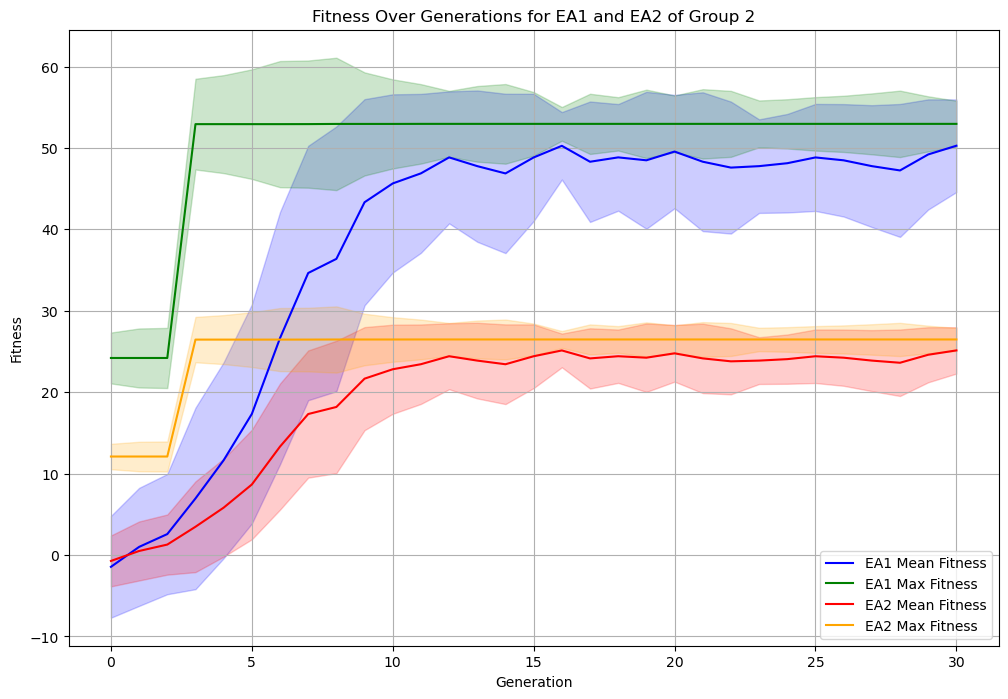

In [22]:
# Plotting the data with shaded regions
plt.figure(figsize=(12, 8))

# Plot for df_EA1_group2 (EA1)
plt.plot(df_EA1_group2['generation'], df_EA1_group2['mean(mean.fitness)'], label='EA1 Mean Fitness', color='blue')
plt.fill_between(df_EA1_group2['generation'], 
                 df_EA1_group2['mean(mean.fitness)'] - df_EA1_group2['stdev(mean.fitness)'], 
                 df_EA1_group2['mean(mean.fitness)'] + df_EA1_group2['stdev(mean.fitness)'], 
                 color='blue', alpha=0.2)

plt.plot(df_EA1_group2['generation'], df_EA1_group2['mean(max.fitness)'], label='EA1 Max Fitness', color='green')
plt.fill_between(df_EA1_group2['generation'], 
                 df_EA1_group2['mean(max.fitness)'] - df_EA1_group2['stdev(max.fitness)'], 
                 df_EA1_group2['mean(max.fitness)'] + df_EA1_group2['stdev(max.fitness)'], 
                 color='green', alpha=0.2)

# Plot for df_EA2_group2 (EA2)
plt.plot(df_EA2_group2['generation'], df_EA2_group2['mean(mean.fitness)'], label='EA2 Mean Fitness', color='red')
plt.fill_between(df_EA2_group2['generation'], 
                 df_EA2_group2['mean(mean.fitness)'] - df_EA2_group2['stdev(mean.fitness)'], 
                 df_EA2_group2['mean(mean.fitness)'] + df_EA2_group2['stdev(mean.fitness)'], 
                 color='red', alpha=0.2)

plt.plot(df_EA2_group2['generation'], df_EA2_group2['mean(max.fitness)'], label='EA2 Max Fitness', color='orange')
plt.fill_between(df_EA2_group2['generation'], 
                 df_EA2_group2['mean(max.fitness)'] - df_EA2_group2['stdev(max.fitness)'], 
                 df_EA2_group2['mean(max.fitness)'] + df_EA2_group2['stdev(max.fitness)'], 
                 color='orange', alpha=0.2)

# Adding labels, title, and legend
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations for EA1 and EA2 of Group 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# Boxplot

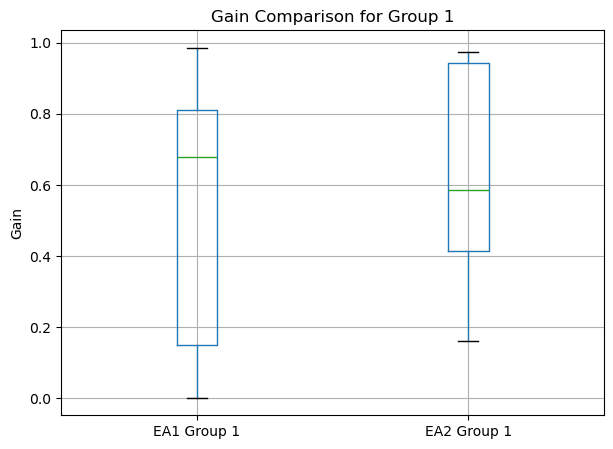

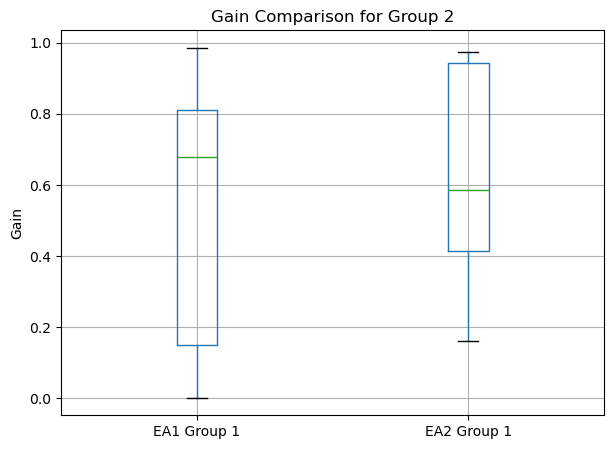

In [3]:
#Dummy data representing the gain measured during 10 runs, for the 4 different algorithms. The gain is obtained by testing against all 8 enemies
gain_EA1_group1 = np.random.rand(10).tolist()
gain_EA1_group2 = np.random.rand(10).tolist()
gain_EA2_group1 = np.random.rand(10).tolist()
gain_EA2_group2 = np.random.rand(10).tolist()

# Combine the gain data into a single DataFrame for plotting
gain_data_group1 = pd.DataFrame({
    'EA1 Group 1': gain_EA1_group1,
    'EA2 Group 1': gain_EA2_group1
})

# Create a boxplot for the combined data
plt.figure(figsize=(7, 5))
gain_data_group1.boxplot()
plt.title('Gain Comparison for Group 1')
plt.ylabel('Gain')
plt.show()

gain_data_group2 = pd.DataFrame({
    'EA1 Group 1': gain_EA1_group2,
    'EA2 Group 1': gain_EA2_group2
})

# Create a boxplot for the combined data
plt.figure(figsize=(7, 5))
gain_data_group1.boxplot()
plt.title('Gain Comparison for Group 2')
plt.ylabel('Gain')
plt.show()


# Statistical test on gains

In [10]:
# Compare group 1 EA1 and EA2
stat1, p_value1 = wilcoxon(gain_EA1_group1, gain_EA2_group1)

# Compare group 1 EA1 and EA2
stat2, p_value2 = wilcoxon(gain_EA1_group2, gain_EA2_group2)

# Create a DataFrame containing both stats
stats_df = pd.DataFrame({
    'Group': ['Group 1', 'Group 2'],
    'Wilcoxon Statistic': [stat1, stat2],
    'P-value': [p_value1, p_value2]
})

print(stats_df)

     Group  Wilcoxon Statistic   P-value
0  Group 1                19.0  0.431641
1  Group 2                25.0  0.845703
